## 성능평가

### 성능평가용 추천 알고리즘

In [1]:
from scipy.spatial.distance import cosine
from scipy.stats import pearsonr
from math import *
import numpy as np

import re

def remove_(x):
    return re.sub("㎡\(전용률[0-9]+%","", x)

In [21]:
class RecSys_for_Eval:
    
    def __init__(self, data, rent):
        data_name = "data_" + data.district +"_"+ data.neighborhood
        self.data = pd.read_csv("C:/Users/user/Desktop/이상형월드컵/"+data_name+"_preprocessed.csv",encoding="utf-8-sig")
        self.rent = rent
        self.price = {
            'rent_min' : 50,
            'rent_max' : 60,
            'deposit_min' : 1000,
            'deposit_max' : 1000,
            'jeonse_min' : 0,
            'jeonse_max' : 0
        }
        self.userItem = [(1.38, 1.3, 8.62, 5.5, 0.615, 1.55 , 3.9, 0.2, 1974.2, 554.1, 89.6, 411, 1, 0, 0, 0)]
        self.top_n = 10
        
    def cosine_similarity(a, b):
        # 코사인 유사도 계산
        return np.dot(a, b.T) / (np.linalg.norm(a) * (np.linalg.norm(b)))
    
    def euclidean_distance(a, b):
        # 유클리드 거리 계산
        distance = 0
        for i in range(len(a)):
            distance += (a[i] - b[i]) ** 2
        return distance ** 0.5
    
    def recommend(self):
        # 가격 범위 내의 데이터만 남기기
        if self.rent == '월세':
            condition = (rent_min <= self.data['월세']) & (rent_max >= self.data['월세']) 
                        & (deposit_min <= self.data['보증금']) & (deposit_max >= self.data['보증금'])
            self.data = self.data[condition]
        else:
            condition = (self.data['전세'] >= jeonse_min) & (self.data['전세'] <= jeonse_max)
            self.data = self.data[condition]

        # 추천 알고리즘에 사용하는 열만 남기기
        col_list = ['방 수', '욕실 수', '평 수', '관리비', '주차 여부', '층', '총 층', '복층 여부', 
                    '사용승인일', '대형마트', '편의점', '지하철역', '방향_동', '방향_서', '방향_남', '방향_북']
        df = self.data[col_list]
        
        # '평 수' 열 데이터 전처리
        df['평 수'] = df['평 수'].apply(remove_)
        df['평 수'] = df['평 수'].astype('float')
        
        # user 아이템 생성
        u_df = pd.DataFrame(self.userItem, columns=df.columns, index=['user'])
        df = df.append(u_df)
        
        # 정규화 
        min_df = df.min()
        max_df = df.max()
        normalization_df = (df - min_df) / (max_df-min_df)
        if min_df['욕실 수'] == max_df['욕실 수']:
            normalization_df['욕실 수'] = df['욕실 수']
        
        # 유사도 계산
        result = u_df.copy()
        user = normalization_df.loc['user'].values
        for idx in u_df.index:
            item = normalization_df.loc[idx].values
            
            cosine = cosine_similarity(item, user)
            result.loc[idx, '코사인'] = cosine
            
            euclidean = 1/(1+euclidean_distance(item, user))
            result.loc[idx, '유클리드'] = euclidean
            
            # 결과에서 user 데이터 행 전체 삭제
            result = result.drop(['user'], axis = 0)
        return result

In [22]:
pd.set_option('display.max_columns', None)
recommendation()

,방 수,욕실 수,평 수,관리비,주차 여부,층,총 층,복층 여부,사용승인일,대형마트,편의점,지하철역,방향_동,방향_서,방향_남,방향_북,코사인,유클리드
0,1.00,1.0,5.74,5.0,0.000,3.00,4.0,0.0,2005.0,739.0,124.0,134.0,0.0,1.0,0.0,0.0,0.485622,0.375144
1,1.00,1.0,3.49,5.0,0.000,2.00,3.0,0.0,2016.0,583.0,28.0,29.0,1.0,0.0,0.0,0.0,0.839406,0.520737
2,2.00,1.0,12.97,4.0,0.000,2.00,3.0,0.0,1809.0,492.0,108.0,105.0,0.0,1.0,0.0,0.0,0.315619,0.345385
3,2.00,1.0,15.02,4.0,0.000,1.00,3.0,0.0,1996.0,279.0,117.0,349.0,0.0,0.0,1.0,0.0,0.500586,0.366186
4,1.00,1.0,6.35,5.0,0.000,4.00,4.0,0.0,2011.0,244.0,155.0,95.0,0.0,0.0,1.0,0.0,0.451051,0.370805
5,1.00,1.0,3.81,4.0,1.000,2.00,5.0,0.0,2012.0,372.0,21.0,189.0,0.0,1.0,0.0,0.0,0.584110,0.383940
6,1.00,1.0,3.49,5.0,0.000,2.00,3.0,0.0,2018.0,239.0,109.0,227.0,0.0,0.5,0.5,0.0,0.508781,0.396684
7,1.00,1.0,5.14,4.0,0.000,2.00,3.0,0.0,2009.0,414.0,88.0,223.0,1.0,0.0,0.0,0.0,0.859532,0.537504
8,1.00,1.0,6.99,6.0,0.000,2.00,5.0,0.0,2019.0,703.0,92.0,99.0,0.0,0.5,0.5,0.0,0.546003,0.397154
9,1.00,1.0,4.87,3.0,0.000,2.00,5.0,0.0,2013.0,158.0,112.0,55.0,0.0,0.0,1.0,0.0,0.435170,0.369129


### 성능 평가


[meric] Intra-list Similarity: item 간의 평균 유사도 값(값이 높을수록 추천 시스템의 성능이 좋다는 것을 의미함)

In [23]:
# Top-N 추천 item 개수
top_n = 7

#### 코사인 유사도 기반 성능 측정

In [24]:
# 코사인 유사도 상위 n개의 item 추출
result_cosine = result['코사인']
result_cosine = result_cosine.dropna()
result_cosine = result_cosine.sort_values(ascending=False)
result_cosine = result_cosine.head(top_n)

# 코사인 유사도 기반 Intra-list Similarity 값
ilSim_cosine = result_cosine.mean()

# 랜덤 모델의 코사인 유사도 측정
result_cos_ran = result['코사인']
result_cos_ran = result_cos_ran.sample(n=top_n, random_state=1)

# 랜덤 모델의 코사인 유사도 기반 Intra-list Similarity 값
ilSim_cos_ran = result_cos_ran.mean()

#### 유클리드 유사도 기반 성능 측정

In [32]:
# 유클리드 유사도 상위 n개의 item 추출
result_euclidean = result['유클리드']
result_euclidean = result_euclidean.dropna()
result_euclidean = result_euclidean.sort_values(ascending=False)
result_euclidean = result_euclidean.tail(top_n)

# 유클리드 유사도 기반 Intra-list Similarity 값
ilSim_euclidean = result_euclidean.mean()

# 랜덤 모델의 유클리드 유사도 측정
result_euc_ran = result['유클리드']
result_euc_ran = result_euc_ran.sample(n=top_n, random_state=1)

# 랜덤 모델의 유클리드 유사도 기반 Intra-list Similarity 값
ilSim_euc_ran = result_euc_ran.mean()

#### 성능 평가 결과 시각화

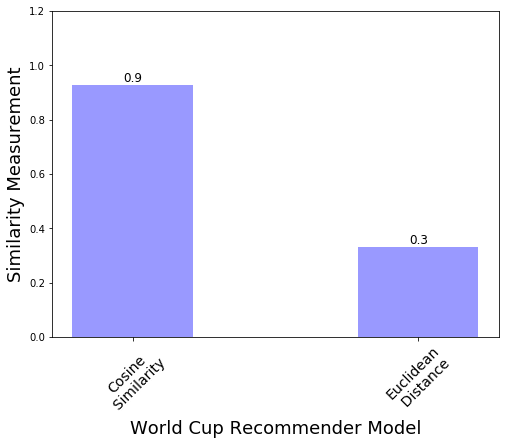

In [40]:
# 월드컵 모델의 유사도별 성능 비교(값이 높을수록 좋은 성능을 의미함)
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

fig, ax = plt.subplots(figsize=(8,6))

label = ['Cosine\n Similarity', 'Euclidean\n Distance']
index = np.arange(len(label))

similarity = [ilSim_cosine, ilSim_euclidean]
value = similarity

bar = plt.bar(index, value, width=0.42, color='b', alpha=0.4)
plt.xlabel('World Cup Recommender Model', fontsize=18)
plt.ylabel('Similarity Measurement', fontsize=18)
plt.xticks(index, label, fontsize=14, rotation=45)
plt.ylim(0,1.2)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)

plt.show()

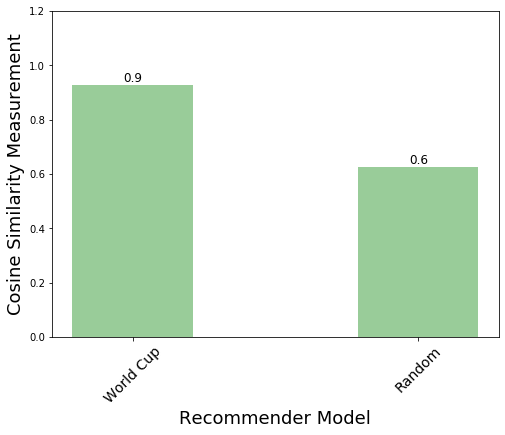

In [41]:
# 모델 간 코사인 유사도 기반 성능 비교(값이 높을수록 좋은 성능을 의미함)
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

fig, ax = plt.subplots(figsize=(8,6))

label = ['World Cup', 'Random']
index = np.arange(len(label))

similarity = [ilSim_cosine, ilSim_cos_ran]
value = similarity

bar = plt.bar(index, value, width=0.42, color='g', alpha=0.4)
plt.xlabel('Recommender Model', fontsize=18)
plt.ylabel('Cosine Similarity Measurement', fontsize=18)
plt.xticks(index, label, fontsize=14, rotation=45)
plt.ylim(0,1.2)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)

plt.show()

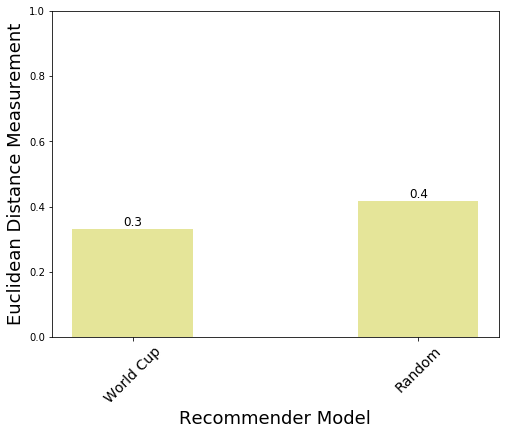

In [42]:
# 모델 간 유클리드 유사도 기반 성능 비교(값이 높을수록 좋은 성능을 의미함)
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

fig, ax = plt.subplots(figsize=(8,6))

label = ['World Cup', 'Random']
index = np.arange(len(label))

similarity = [ilSim_euclidean, ilSim_euc_ran]
value = similarity

bar = plt.bar(index, value, width=0.42, color='y', alpha=0.4)
plt.xlabel('Recommender Model', fontsize=18)
plt.ylabel('Euclidean Distance Measurement', fontsize=18)
plt.xticks(index, label, fontsize=14, rotation=45)
plt.ylim(0,1)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)

plt.show()